# Deep Code Curator - Queries

## Prerequisites

Please check our [readme](./) for the requirements file and other prerequisites.

## Specify Server


In [1]:
# Update below address if you use another server-port
server_address = "http://localhost:8890/sparql"

## Import Modules

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.display import display
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 999


def execute_query(sparqlQuery):
    sparql = SPARQLWrapper(server_address)
    sparql.setQuery(sparqlQuery)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    results_df = json_normalize(results["results"]["bindings"])
    # results_df = results_df[results_df['o.type'] == "uri"]
    # results_df = results_df.drop(['o.datatype','o.type', 'o.xml:lang','p.type'],axis=1)
    # results_df = results_df[['p.value','o.value','countS.value']]
    # results_df['countS.value'] = results_df['countS.value'].astype(int)
    # results_df = results_df[results_df['countS.value'] > 1]
    return results_df

## Query 1: Number of publications by year across all conferences

[Text(0, 0.5, 'Publication Counts'), Text(0.5, 0, 'Years')]

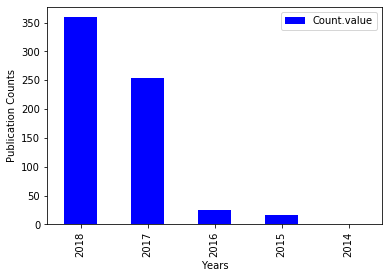

In [12]:
yearCount = """
Select count(distinct ?s) as ?Count ?year FROM <https://github.com/deepcurator/DCC/>

where {

?s a <https://github.com/deepcurator/DCC/Publication> .
?s <https://github.com/deepcurator/DCC/conferenceSeries> ?o .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .

}Group by ?year ORDER by DESC(?year)

"""

results_df = execute_query(yearCount)

results_df = results_df.drop(['Count.datatype', 'Count.type',  'year.datatype',
       'year.type'],axis=1)

results_df.columns

results_df.head()
# results_df['Count.value'].hist(by='year.value')
# results_df['Count.value'].plot.bar()
# print(results_df)

results_df = results_df.astype(int)
# plt.figure()

ax = results_df.plot(kind='bar',x='year.value',y='Count.value',color='blue')

ax.set(xlabel = "Years", ylabel = "Publication Counts")

## Query 2: Number of publications by conference series and by year

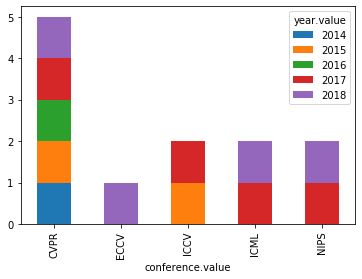

In [4]:
conferenceyear = """

Select count(distinct ?s) as ?Count ?conference ?year FROM <https://github.com/deepcurator/DCC/>

where {


?s a <https://github.com/deepcurator/DCC/Publication> .
?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .

}

"""

results_df = execute_query(conferenceyear)
results_df.columns

results_df = results_df.drop(['Count.datatype', 'Count.type',  'conference.type','year.datatype',
       'year.type'],axis=1)

results_df.head()
results_df["Count.value"] = pd.to_numeric(results_df["Count.value"])
results_df["year.value"] = pd.to_numeric(results_df["year.value"])
results_df.groupby(['conference.value','year.value']).size().unstack().plot(kind='bar',stacked='True')
plt.show()

## Query 3: PyTorch and Tensorflow Trends

[Text(0, 0.5, 'Platform'), Text(0.5, 0, 'Years')]

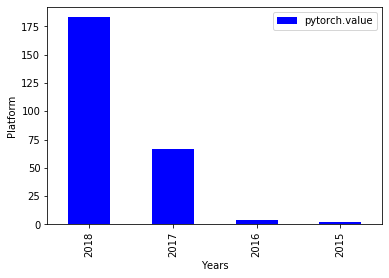

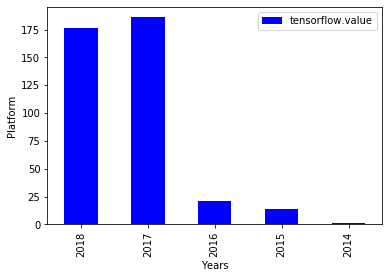

In [13]:
#### Trends in year 
platformtrends = """

Select count(?platform) as ?pytorch ?platform ?year FROM <https://github.com/deepcurator/DCC/>

where {


?s a <https://github.com/deepcurator/DCC/Publication> .
?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .
?s <https://github.com/deepcurator/DCC/platform> ?platform .

FILTER(STR(?platform) ="pytorch")
} 
group by  ?platform ?year order by DESC(?year)

"""

results_df = execute_query(platformtrends)
results_df.columns
results_df.head()

results_df = results_df.drop(['pytorch.datatype', 'platform.type','pytorch.type',  'platform.type','year.datatype',
       'year.type'],axis=1)

results_df.head()
results_df["pytorch.value"] = pd.to_numeric(results_df["pytorch.value"])

results_df["year.value"] = pd.to_numeric(results_df["year.value"])
# results_df.groupby(['platform.value','year.value']).size().unstack().plot(kind='bar',stacked='True')

ax = results_df.plot(kind='bar',x='year.value',y='pytorch.value',color='blue')

ax.set(xlabel = "Years", ylabel = "Platform")
# results_df["Count.value"] = pd.to_numeric(results_df["Count.value"])
# results_df["year.value"] = pd.to_numeric(results_df["year.value"])
# plt.show()

platformtrends = """

Select count(?platform) as ?tensorflow ?platform ?year FROM <https://github.com/deepcurator/DCC/>

where {


?s a <https://github.com/deepcurator/DCC/Publication> .
?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .
?s <https://github.com/deepcurator/DCC/platform> ?platform .

FILTER(STR(?platform) ="tensorflow")
} 
group by  ?platform ?year order by DESC(?year)

"""

results_df = execute_query(platformtrends)
results_df.columns
results_df.head()

results_df = results_df.drop(['tensorflow.datatype', 'platform.type','tensorflow.type',  'platform.type','year.datatype',
       'year.type'],axis=1)

results_df.head()
results_df["tensorflow.value"] = pd.to_numeric(results_df["tensorflow.value"])

results_df["year.value"] = pd.to_numeric(results_df["year.value"])
# results_df.groupby(['platform.value','year.value']).size().unstack().plot(kind='bar',stacked='True')

ax = results_df.plot(kind='bar',x='year.value',y='tensorflow.value',color='blue')

ax.set(xlabel = "Years", ylabel = "Platform")

## Query 4: Function trends across conferences 

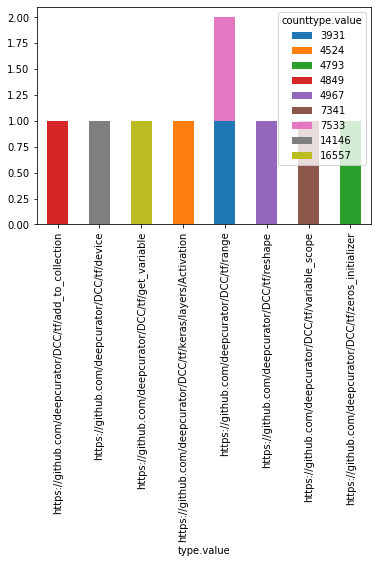

In [14]:
functiontrends = """

Select count(?type) as ?counttype  ?type  ?conference FROM <https://github.com/deepcurator/DCC/>

where {

?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .
?s <https://github.com/deepcurator/DCC/hasRepository> ?repository .
?repository <https://github.com/deepcurator/DCC/hasFunction> ?y.
?y a ?type .
FILTER(!(STR(?type) = "https://github.com/deepcurator/DCC/UserDefined")).

}group by ?type ?conference ORDER by DESC(?counttype)


"""

results_df = execute_query(functiontrends)
results_df.columns

results_df = results_df.drop(['counttype.datatype', 'conference.type','counttype.type',  'type.type',
       ],axis=1)

results_df.head()
results_df["counttype.value"] = pd.to_numeric(results_df["counttype.value"])

results_df = results_df[results_df['counttype.value'] > 3000]
# results_df["year.value"] = pd.to_numeric(results_df["year.value"])

results_df.groupby(['type.value','counttype.value']).size().unstack().plot(kind='bar',stacked='True')